## Car Live Prediction System

### Overview : The Main Objective is to Predict the Car Selling Price of a second hand car by taking into consideration different features and taking present price as a reference.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Desktop/Datasets/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Exploratory Data Analysis

In [8]:
df.shape

(301, 9)

In [10]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [11]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Feature Engineering

### We are adding a new column called total years which will render the period used till current date

In [13]:
df['No. of Years'] = 2020 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. of Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [14]:
df['Car_Name']=df['Car_Name'].apply(lambda x : x.capitalize())
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. of Years
0,Ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,Sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,Ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,Wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,Swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [16]:
df2 = df.drop(['Year','Owner','Car_Name'],axis='columns')
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,No. of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,6


## One Hot Encoding

In [18]:
df3 = pd.get_dummies(df2,drop_first=True)
df3.head()

,Selling_Price,Present_Price,Kms_Driven,No. of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,6,0,1,0,1
1,4.75,9.54,43000,7,1,0,0,1
2,7.25,9.85,6900,3,0,1,0,1
3,2.85,4.15,5200,9,0,1,0,1
4,4.60,6.87,42450,6,1,0,0,1


In [22]:
corrmatt = df3.corr()

In [20]:
import seaborn as sns

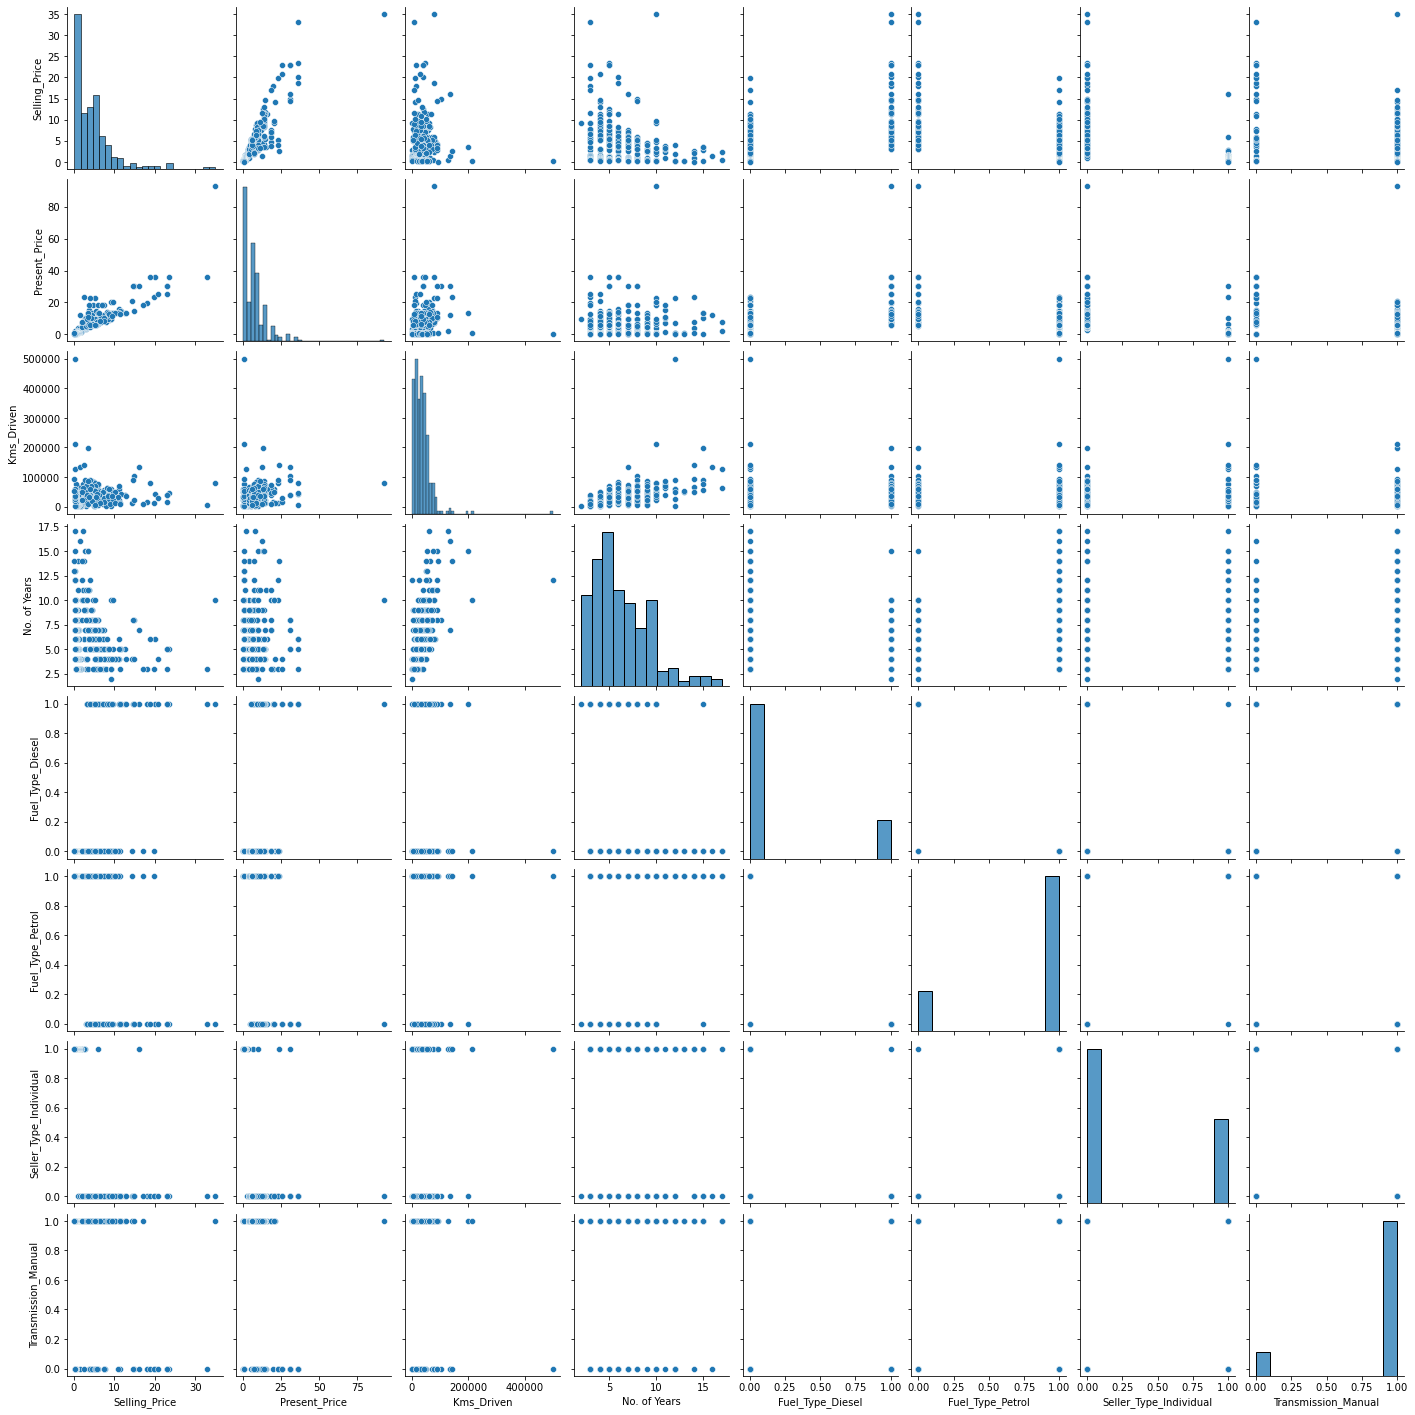

In [21]:
sns.pairplot(df3)

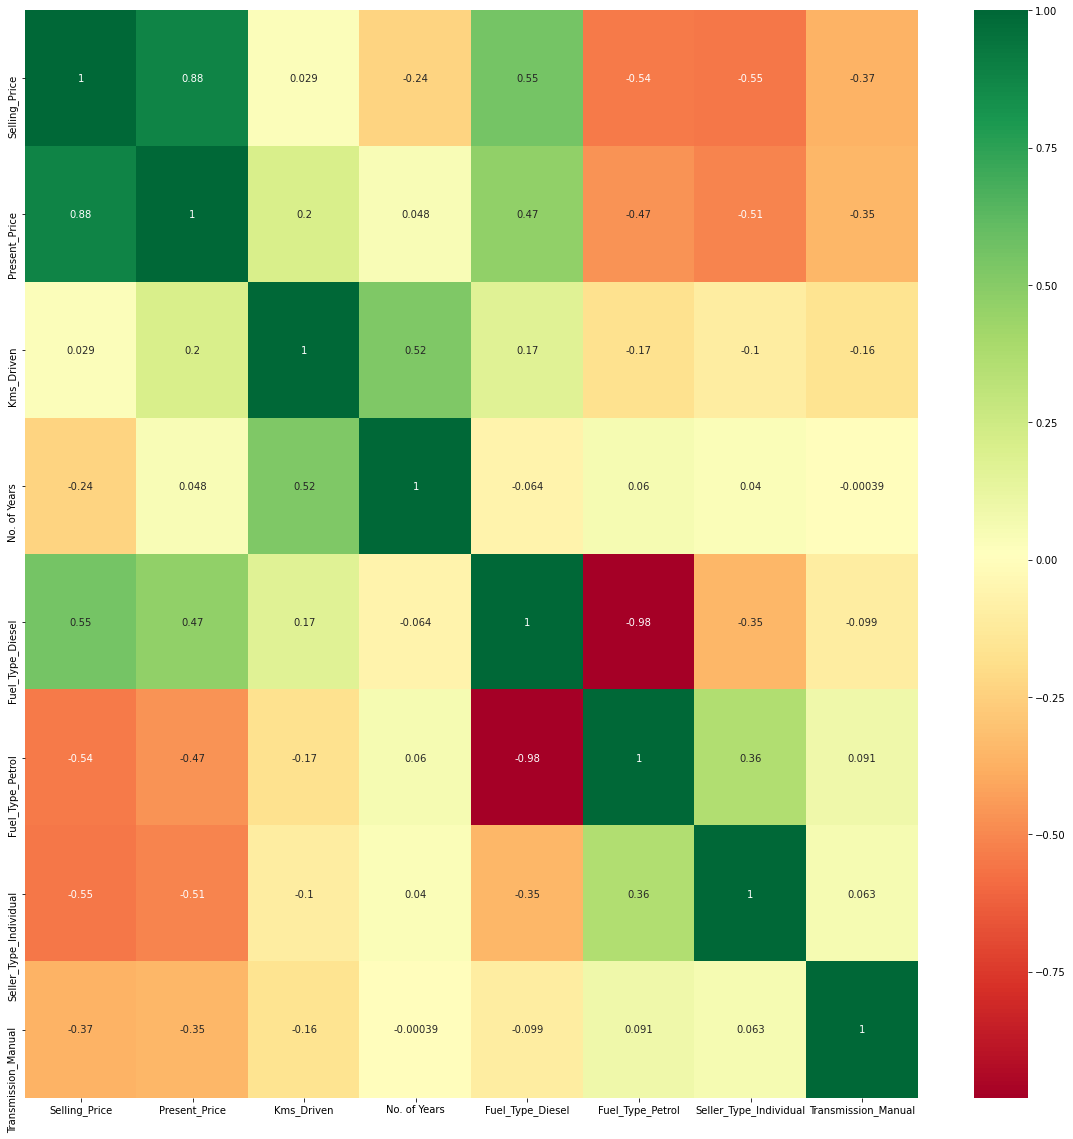

In [26]:
%matplotlib inline
top_corr_features = corrmatt.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [27]:
X = df3.iloc[:,1:]
Y = df3.iloc[:,0]

In [28]:
X.head()

,Present_Price,Kms_Driven,No. of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,6,0,1,0,1
1,9.54,43000,7,1,0,0,1
2,9.85,6900,3,0,1,0,1
3,4.15,5200,9,0,1,0,1
4,6.87,42450,6,1,0,0,1


In [29]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
Model = ExtraTreesRegressor()
Model.fit(X,Y)

ExtraTreesRegressor()

In [31]:
Model.feature_importances_

array([0.37115956, 0.04256777, 0.07655696, 0.23934836, 0.00943942,
       0.1260052 , 0.13492273])

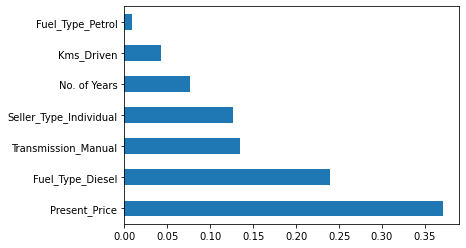

In [35]:
Feature_Importances = pd.Series(Model.feature_importances_,index=X.columns)
Feature_Importances.nlargest(10).plot(kind='barh')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.2)

In [38]:
X_Train.shape

(240, 7)

In [39]:
from sklearn.ensemble import RandomForestRegressor
RF_Rand = RandomForestRegressor()
N_Estimators = [int(X) for X in np.linspace(start=100,stop=1200,num=12)]
Max_Features = ['auto','sqrt']
#Maximum no. of levels in Tree
Max_Depth = [int(X) for X in np.linspace(start=5,stop=30,num=6)]
Min_Samples_Split = [2, 5, 10, 15, 100]
Min_Samples_Leaf = [1, 2, 5, 10]

In [40]:
Random_Grid = {
    'n_estimators' : N_Estimators,
    'max_features' : Max_Features,
    'max_depth' : Max_Depth,
    'min_samples_split' : Min_Samples_Split,
    'min_samples_leaf' : Min_Samples_Leaf
}
print(Random_Grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:
from sklearn.model_selection import RandomizedSearchCV
RF = RandomForestRegressor()

## RandomizedSearchCV Classifier

## We are performing Hyperparameter Tuning during Model Tuning
### Considering the arguments below :
### Number of trees in random forest
### Number of features to consider at every split
### Maximum number of levels in tree
### Minimum number of samples required to split a node
### Minimum number of samples required at each leaf node

In [42]:
RF_Rand2 = RandomizedSearchCV(estimator=RF,param_distributions=Random_Grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=1)
RF_Rand2.fit(X_Train,Y_Train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.7s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   2.5s
[CV] n_estimators=1000, min_samples_split

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [43]:
print(RF_Rand2.best_params_)

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


In [44]:
RF_Rand2.best_score_

-1.7752812683641856

In [45]:
predictions = RF_Rand2.predict(X_Test)

C:\Users\Shrikant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

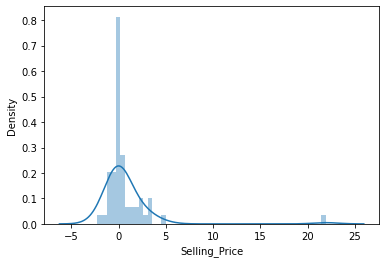

In [51]:
sns.distplot(Y_Test - predictions)

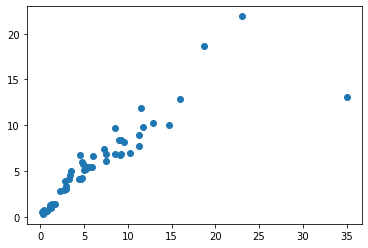

In [48]:
plt.scatter(Y_Test,predictions)

### Result Metrics

In [49]:
from sklearn import metrics
print(f"Mean Absolute Error : {metrics.mean_absolute_error(Y_Test,predictions)}.")
print(f"Mean Squared Error : {metrics.mean_squared_error(Y_Test, predictions)}.")
print(f"Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(Y_Test,predictions))}.")

Mean Absolute Error : 1.2023853339060804.
Mean Squared Error : 9.670301631156299.
Root Mean Squared Error : 3.109710859735403.


### Inputs For Test

In [86]:
#Tester Code
from random import randint,choice
from sklearn.preprocessing import StandardScaler,MinMaxScaler
PresentPrices = [randint(25000,100001) for i in range(1,11)]
Kms_Driven = [randint(5000,200002) for i in range(1, 31)]
Owner = [randint(0,2) for i in range(5)]
CurrentYear = 2021
Years = [randint(1980,2001) for i in range(10)]
#Fuel_Type_Petrol = ['Petrol','Diesel','CNG']
#Fuel_Type_Chosen = str(input('Fuel Type >> '))
Prediction = Model.predict([[choice(PresentPrices),choice(Kms_Driven),choice(Owner),CurrentYear - choice(Years),1,1,1]])
Output = round(Prediction[0],2)
if Output < 0:
    print(f"Sorry, This car is unfit for Selling.")
else:
    print(f"You can sell the Car at {Output}.")

You can sell the Car at 32.14.
